### Contents:
    01 Importing libraries and data
    02 Data exploration
    03 Merge
    04 Derive variables/flags
        a product price range
        b loyalty
    05 Charts
        a bar chart
        b histogram
        c scatterplot
    06 Sampling using seed
    07 More charts
        a lineplot
    08 Export

# Exercise 4.9

## 01 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Emily/Documents/CF Data Analysis Program/Immersion 4/Instacart Basket Analysis'

In [66]:
df_data = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_big.pkl'))

In [56]:
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'prepared data', 'customers_clean.csv'), index_col=0)

## 02 Quick check

### first, for the big df

In [67]:
df_data.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both


In [68]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32436240
Data columns (total 14 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_day_of_week       int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       uint8   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  _merge                  category
dtypes: category(1), float16(1), float32(1), int16(1), int32(3), int8(5), object(1), uint8(1)
memory usage: 1.3+ GB


In [69]:
df_data.shape

(32434212, 14)

In [70]:
# days_since_prior_order being NaN is ok because that indicates a first order
# there are 11 products without names
# all of the super high prices were changed to NaN
# so all this info makes sense!
df_data.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    2078084
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                28171
aisle_id                        0
department_id                   0
prices                       5127
_merge                          0
dtype: int64

### second, for the customer df

In [57]:
df_cust.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [58]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   first_name    194950 non-null  object
 2   last_name     206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 17.3+ MB


In [59]:
df_cust['user_id'] = df_cust['user_id'].astype('int32')

In [60]:
df_cust['age'] = df_cust['age'].astype('int8')

In [62]:
df_cust['n_dependants'] = df_cust['n_dependants'].astype('int8')

In [63]:
df_cust['income'] = df_cust['income'].astype('int32')

In [64]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int32 
 1   first_name    194950 non-null  object
 2   last_name     206209 non-null  object
 3   gender        206209 non-null  object
 4   state         206209 non-null  object
 5   age           206209 non-null  int8  
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int8  
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int32 
dtypes: int32(2), int8(2), object(6)
memory usage: 13.0+ MB


In [65]:
df_cust.shape

(206209, 10)

## 03 Merge data df with customer df

In [71]:
df = df_data.merge(df_cust, how = 'inner', on = 'user_id')

In [72]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 23 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_day_of_week       int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              int32   
 7   add_to_cart_order       uint8   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  _merge                  category
 14  first_name              object  
 15  last_name               object  
 16  gender                  object  
 17  state                   object  
 18  age                     int8    
 19  date_joined             object  
 20  n_dependants            int8    
 21  fam_st

## 04 Adding flags (from previous tasks)

### a) Product prices

In [74]:
df.loc[df['prices'] > 15, 'price_range'] = 'high'
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range'] = 'mid' 
df.loc[df['prices'] <= 5, 'price_range'] = 'low'

### b) Loyalty

In [75]:
# create a new column with the max order number for each user
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [76]:
df.loc[df['max_order'] > 40, 'loyalty_flag'] = 'loyal'
df.loc[(df['max_order'] <= 40) & (df['max_order'] > 10), 'loyalty_flag'] = 'regular'
df.loc[df['max_order'] <= 10, 'loyalty_flag'] = 'new'

In [77]:
df['loyalty_flag'].value_counts(dropna = False)

regular    15891077
loyal      10293737
new         6249398
Name: loyalty_flag, dtype: int64

In [18]:
df.head(15)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,max_order,loyalty_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,mid,10,new
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,mid,10,new
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,both,mid,10,new
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,both,mid,10,new
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,both,mid,10,new


## 05 Charts

### a) Bar charts

<AxesSubplot:>

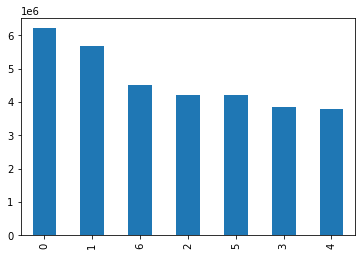

In [78]:
# frequency bar chart created with value_counts
df['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

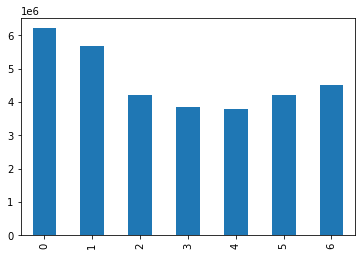

In [79]:
# sort it in a way that makes sense
df['order_day_of_week'].value_counts().sort_index().plot.bar()

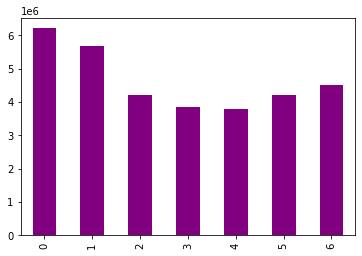

In [25]:
# start to customize with color 
# store the chart as a variable
bar = df['order_day_of_week'].value_counts().sort_index().plot.bar(color=['purple'])

In [27]:
# save the chart as a png file for later use
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### b) Histogram

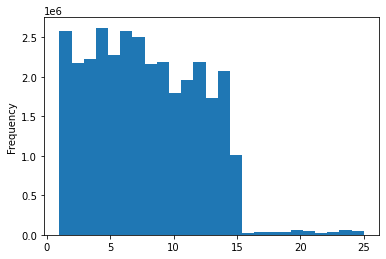

In [80]:
hist = df['prices'].plot.hist(bins = 25)

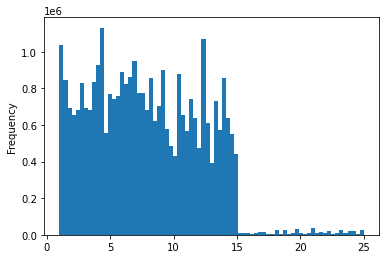

In [81]:
hist_2 = df['prices'].plot.hist(bins = 75)

In [32]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### c) Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

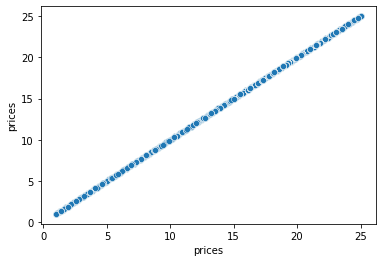

In [30]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

## 06 Sampling

In [33]:
# pick a random number for the seed
# then create a list that is as long as the df with a defined ratio of true/false
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [82]:
# store 70% of the data in df_big
# store the rest of the 30% of the data in df_small
df_big = df[dev]
df_small = df[~dev]

## 07 Back to charts

### a) Line plot

In [37]:
# only grabbing two columns of the df_small
df_small_2 = df_small[['order_day_of_week', 'prices']]

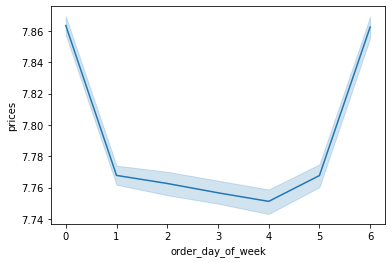

In [38]:
line = sns.lineplot(data=df_small_2, x='order_day_of_week', y='prices')

# Task 4.9

### Part 2, Step 3

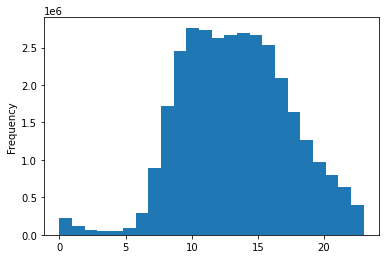

In [39]:
hist_3 = df['order_hour_of_day'].plot.hist(bins = 24)

This histogram is showing that the vast majority of products are ordered in middle of the day, between the hours of 10am and 3pm (15 on the chart). Very few products are ordered in the middle of the night, especially after midnight (0 on the chart). This isn't just showing orders - because it's not grouped by orders - it's showing number of products purchased within those orders.

### Part 2, Step 4

In [49]:
# this is counting the number of products in each of these categories
df['loyalty_flag'].value_counts(dropna=False)

regular    15891077
loyal      10293737
new         6249398
Name: loyalty_flag, dtype: int64

In [47]:
# when we count the number of unique order_ids, then we get orders, not products purchased
df[['order_id', 'loyalty_flag']].groupby(['loyalty_flag']).nunique()

,order_id
loyalty_flag,
loyal,1024570
new,637097
regular,1553194


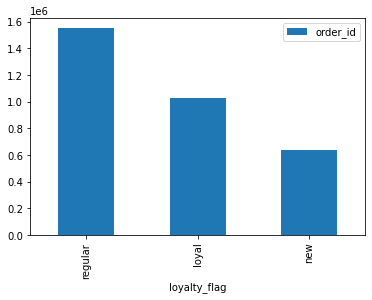

In [53]:
# you can break object calling/notation by using parentheses around the whole thing!

bar_2 = (df[['order_id', 'loyalty_flag']].groupby(['loyalty_flag']).nunique()
         .sort_values(by='order_id', ascending=False).plot.bar())

### Part 2, Step 5

In [54]:
# only grabbing two columns of the df_small
df_small_3 = df_small[['order_hour_of_day', 'prices']]

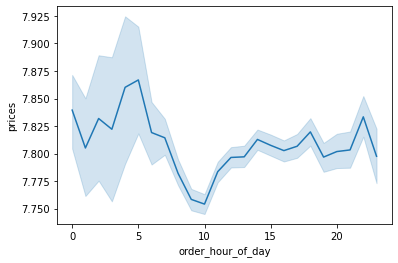

In [85]:
line_2 = sns.lineplot(data=df_small_3, x='order_hour_of_day', y='prices')

On average, the lowest priced products are bought around 10am. There is a high variability of the prices for products bought in the middle of the night, probably because there are just significantly fewer orders placed.

### Part 2, Step 6

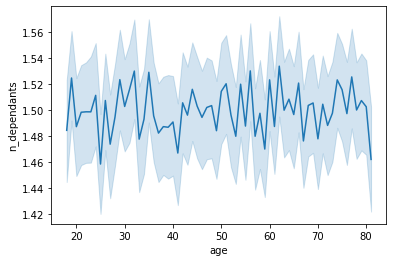

In [84]:
line_3 = sns.lineplot(data=df_cust, x='age', y='n_dependants')

There doesn't appear to be a connection between age and number of dependants.

### Part 2, Step 7

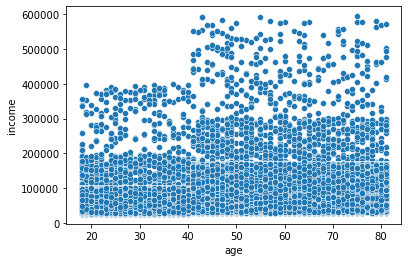

In [83]:
scatter = sns.scatterplot(data=df_cust, x='age', y='income')

This scatterplot is showing that the majority of customers make $200k or less. There is also a clear divide around age 40 where income increases.

## Export

### data files

In [86]:
df.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_full.pkl'))

In [87]:
df_big.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_full_70.pkl'))

In [88]:
df_small.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'df_full_30.pkl'))

In [89]:
df_cust.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'customers_clean.pkl'))

### charts

In [90]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_income.png'))

In [91]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))